In [42]:
import torch
from pathlib import Path 
import sys
root_path = Path('deblend/galaxy-net')
src_path = root_path.joinpath('src')
sys.path.insert(0, root_path.as_posix())

from src.models.galaxy_net import OneCenteredGalaxy
from src.models.galaxy_net import CenteredGalaxyDecoder

import matplotlib.pyplot as plt 



In [84]:
#For example we can look at the data/test8 where we 
#have an instance of galbasic with the following parameters.
#slen = 30 
# ds = datasets.GalBasic(30, min_galaxies=1, max_galaxies=1, mean_galaxies=1, 
#                        num_images=1, centered=True, sky=700)

#dec = CenteredGalaxyDecoder(40)
vae = OneCenteredGalaxy(40, num_bands=6, latent_dim=8)
vae.load_state_dict(torch.load("/home/imendoza/deblend/galaxy-net/reports/testing2/test1/params/vae_params_140.dat"))


<All keys matched successfully>

tensor([ 0.3105, -0.3771, -1.5291, -0.0802,  0.5705,  0.9401,  0.7847, -0.7593])


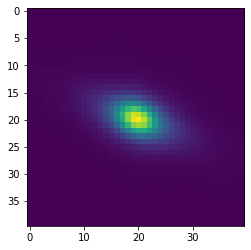

In [112]:
from torch.distributions import Normal
p_z = Normal(torch.zeros(1), torch.eye(1))
z = p_z.rsample(torch.tensor([8])).view(-1)
out, _ = vae.dec.forward(z)
print(z)
plt.imshow(out[0,0].detach().numpy())

In [37]:
torch.tensor(8)


tensor(8)

In [49]:
print(vae.state_dict().keys())
print(vae.enc.state_dict().keys())


odict_keys(['zero', 'one', 'enc.features.0.weight', 'enc.features.0.bias', 'enc.features.2.weight', 'enc.features.2.bias', 'enc.features.4.weight', 'enc.features.4.bias', 'enc.features.7.weight', 'enc.features.7.bias', 'enc.features.9.weight', 'enc.features.9.bias', 'enc.features.10.weight', 'enc.features.10.bias', 'enc.features.13.weight', 'enc.features.13.bias', 'enc.features.15.weight', 'enc.features.15.bias', 'enc.fc_mean.weight', 'enc.fc_mean.bias', 'enc.fc_var.weight', 'enc.fc_var.bias', 'dec.fc.0.weight', 'dec.fc.0.bias', 'dec.fc.2.weight', 'dec.fc.2.bias', 'dec.deconv.0.weight', 'dec.deconv.0.bias', 'dec.deconv.2.weight', 'dec.deconv.2.bias', 'dec.deconv.4.weight', 'dec.deconv.4.bias', 'dec.deconv.6.weight', 'dec.deconv.6.bias', 'dec.deconv.7.weight', 'dec.deconv.7.bias'])
odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.4.weight', 'features.4.bias', 'features.7.weight', 'features.7.bias', 'features.9.weight', 'features.9.bia

In [41]:
dir(vae.enc.features[13])

['__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_tracing_name',
 '_version',
 'add_module',
 'apply',
 'bias',
 'buffers',
 'children',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'float',
 'forward',
 'half',
 'in_features',
 'load_state_dict',
 '

In [44]:
vae.enc.features[13].state_dict()

OrderedDict([('weight',
              tensor([[-0.0361, -0.0599, -0.0417,  ..., -0.0333, -0.0577,  0.0041],
                      [-0.0401,  0.0397, -0.0512,  ...,  0.0223, -0.0418,  0.0040],
                      [-0.0011,  0.0267, -0.0614,  ..., -0.0550,  0.0552, -0.0094],
                      ...,
                      [-0.0441, -0.0181, -0.0270,  ..., -0.0400,  0.0237, -0.0022],
                      [-0.0510,  0.0082,  0.0257,  ..., -0.0524, -0.0199,  0.0464],
                      [-0.0264, -0.0578, -0.0389,  ..., -0.0219, -0.0613, -0.0116]])),
             ('bias',
              tensor([-0.0048, -0.0515,  0.0360,  0.0174, -0.0238, -0.0257, -0.0193, -0.0241,
                       0.0208,  0.0110, -0.0232, -0.0116,  0.0383,  0.0123, -0.0590,  0.0108,
                      -0.0084, -0.0096, -0.0441, -0.0207,  0.0410,  0.0152,  0.0247, -0.0101,
                      -0.0552, -0.0325,  0.0485, -0.0054,  0.0621, -0.0581,  0.0237,  0.0402,
                      -0.0138,  0.0103, -0.0